In [1]:
#Importação das bibliotecas necessárias

import os
import string
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import collections

import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from wordcloud import WordCloud

In [5]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
diretorio_arquivo = r'D:\Wesley\VersionCode\AprendendoPython\AprendendoPython\MachineLearning\Analises Sentimento\Datasets\avaliacoes_train.csv'

diretorio_pc_casa =r'D:\Wesley\Python\AprendendoPython\MachineLearning\Analises Sentimento\Datasets\avaliacoes_train.csv'

In [3]:
dados = pd.read_csv(diretorio_arquivo)

dados.head(10)

,ID,Avaliacao,Titulo,Texto
0,3,0,Sempre muito bom,Atendimento impecável comida muito boa e rápi...
1,7,0,Top,Um dos melhores de Brasília recomendo muito ms...
2,10,0,Excelente atendimento,Nunca fui tão bem atendido em um restaurante ...
3,11,0,Vista privilegiada,Lugar maravilhoso com vista para o Lago Sul em...
4,16,0,Jantar,Excelente Janiel. Tanto sua receptividade qu...
5,17,0,Boa opção para jantar,É um restaurante é grande e bem decorado. Ficá...
6,18,0,Ótimo,Numa 5f almoçamos no sistema self service com ...
7,26,0,Perfeito. Vista maravilhosa,Jantamos hj no restaurante. Atendimento nota 1...
8,27,0,Jantar numa ala reservada.,Estivemos num jantar como uma extensão de um d...
9,29,0,Melhor Da cidade!!!,Sempre uma boa surpresa bom ambiente ótimo s...


## Limpeza de dados 
1.remoção de pontuação 
2.remoção de url
2.geração de token
2.remoção de stop_words
2.remoção de url

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wesley.neves\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
custon_stop_words = ['nessa','todo','pra','vou','aqui','se','.',',','lá','vcs','pois','"',':','``']
punctuation = list(string.punctuation)
lista_stopwords  = set(stopwords.words('portuguese') + punctuation + custon_stop_words+ ['rt', 'via'])

### funçoes

In [5]:
def remove_url(texto):
    return re.sub(r'http\S+', '', texto)

In [6]:
def set_tokenize(texto):
    return word_tokenize(texto)

In [7]:
def remove_stop_Words(texto,lista_stopwords):
    palavras =set_tokenize(texto)
    palavras_sem_stopwords = [palavra.lower() for palavra in palavras if palavra.lower() not in lista_stopwords]
    return (palavras_sem_stopwords)

In [8]:
def remove_caracteres_especiais(texto):
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    remove = ''.join([i for i in texto if not i in punctuations])
    remove_1 =  re.sub(r" ?\([^)]+\)", "", remove)
    remove_2 =''.join(remove_1).replace("'", " ")
    remove_3 =''.join(remove_2).replace("[", " ")
    remove_4 =''.join(remove_3).replace("]", " ")
    return str(remove_4)    

In [9]:
### recuperar o conteudo a ser trabalhado
def normaliza_dados(texto,lista_stopwords):
    valor = remove_url(texto)
    valor_2 = remove_caracteres_especiais(valor)
    remove =remove_stop_Words(valor_2,lista_stopwords)

    return remove


## Mostra o antes e o depois do processamento

In [10]:
dados[['Titulo','Texto']].head(2)

,Titulo,Texto
0,Sempre muito bom,Atendimento impecável comida muito boa e rápi...
1,Top,Um dos melhores de Brasília recomendo muito ms...


## Limpeza dos dados

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wesley.neves\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Faz o clone do dataframe para limpeza



In [11]:
clone = pd.DataFrame.copy(dados)

In [12]:
clone["ConteudoLimpo"] =''
clone["Bigrama"] =''

clone.head(5)



,ID,Avaliacao,Titulo,Texto,ConteudoLimpo,Bigrama
0,3,0,Sempre muito bom,Atendimento impecável comida muito boa e rápi...,,
1,7,0,Top,Um dos melhores de Brasília recomendo muito ms...,,
2,10,0,Excelente atendimento,Nunca fui tão bem atendido em um restaurante ...,,
3,11,0,Vista privilegiada,Lugar maravilhoso com vista para o Lago Sul em...,,
4,16,0,Jantar,Excelente Janiel. Tanto sua receptividade qu...,,


In [13]:

clone['ConteudoLimpo'] = [normaliza_dados(texto,lista_stopwords) for texto in clone['Texto']]


In [14]:
clone.head(5)

,ID,Avaliacao,Titulo,Texto,ConteudoLimpo,Bigrama
0,3,0,Sempre muito bom,Atendimento impecável comida muito boa e rápi...,"[atendimento, impecável, comida, boa, rápida, ...",
1,7,0,Top,Um dos melhores de Brasília recomendo muito ms...,"[melhores, brasília, recomendo, msm, podem, ir...",
2,10,0,Excelente atendimento,Nunca fui tão bem atendido em um restaurante ...,"[nunca, tão, bem, atendido, restaurante, princ...",
3,11,0,Vista privilegiada,Lugar maravilhoso com vista para o Lago Sul em...,"[lugar, maravilhoso, vista, lago, sul, ambient...",
4,16,0,Jantar,Excelente Janiel. Tanto sua receptividade qu...,"[excelente, janiel, tanto, receptividade, aten...",


## Calcular a frequencia de palavras


In [16]:
all_comentarios_list = list(itertools.chain(*clone['ConteudoLimpo']))

# Create counter
counts_list = collections.Counter(all_comentarios_list)


dataframe = pd.DataFrame(counts_list.most_common(20),
                             columns=['termo', 'quantidade'])

dataframe.head(10)

,termo,quantidade
0,atendimento,11963
1,comida,11829
2,bem,9399
3,restaurante,7757
4,bom,7716
5,ambiente,7677
6,excelente,6564
7,pratos,5640
8,boa,5144
9,agradável,4672


## analisamos os termos mais encontrados

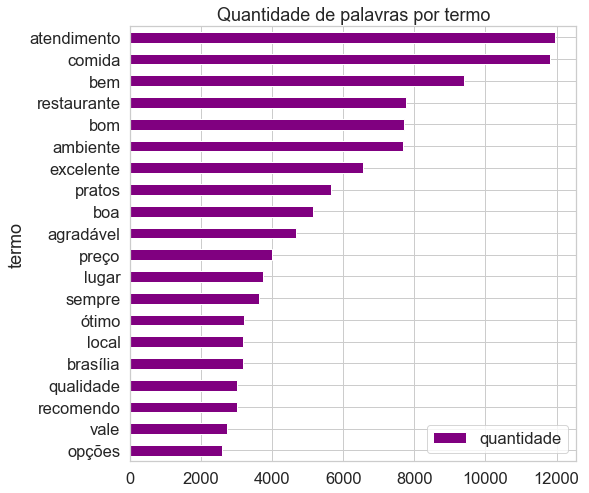

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dataframe.sort_values(by='quantidade').plot.barh(x='termo',
                      y='quantidade',
                      ax=ax,
                      color="purple")

ax.set_title("Quantidade de palavras por termo")

plt.show()

## explorando os bigramas


In [18]:
clone['Bigrama'] =clone['ConteudoLimpo'].apply(lambda row: list(nltk.ngrams(row,2)))

In [19]:
clone.head(2)

,ID,Avaliacao,Titulo,Texto,ConteudoLimpo,Bigrama
0,3,0,Sempre muito bom,Atendimento impecável comida muito boa e rápi...,"[atendimento, impecável, comida, boa, rápida, ...","[(atendimento, impecável), (impecável, comida)..."
1,7,0,Top,Um dos melhores de Brasília recomendo muito ms...,"[melhores, brasília, recomendo, msm, podem, ir...","[(melhores, brasília), (brasília, recomendo), ..."


In [20]:
bigrams = list(itertools.chain(*clone['Bigrama']))

bigram_counts = collections.Counter(bigrams)


dataframe_bigrama = pd.DataFrame(bigram_counts.most_common(1000),
                             columns=['bigram', 'count'])

dataframe_bigrama.head(60)      
                       

,bigram,count
0,"(ambiente, agradável)",1922
1,"(vale, pena)",1906
2,"(comida, boa)",1608
3,"(atendimento, bom)",1385
4,"(bom, atendimento)",1224
5,"(coco, bambu)",1148
6,"(frutos, mar)",1106
7,"(excelente, atendimento)",961
8,"(atendimento, excelente)",910
9,"(ótimo, atendimento)",908


## gerar um grafico dos bigramas

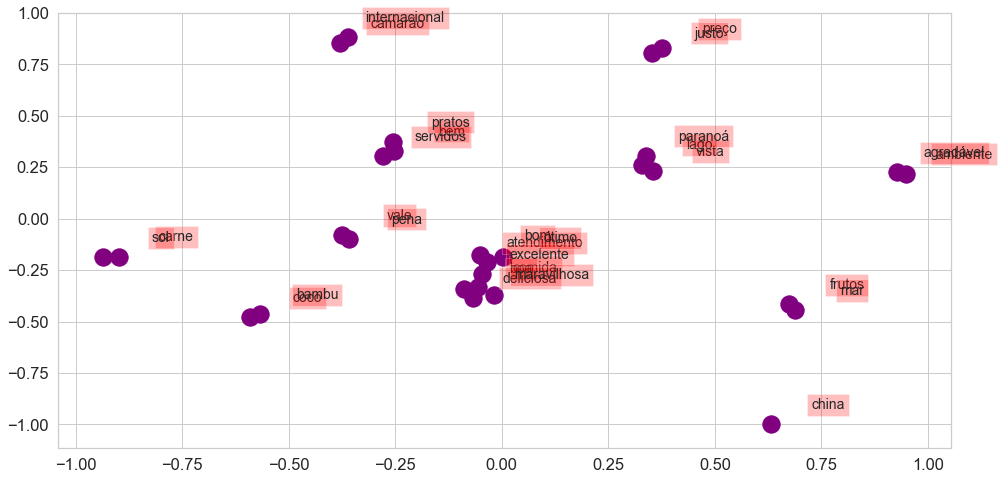

In [21]:
# Create dictionary of bigrams and their counts
d = dataframe_bigrama.head(20).set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 2))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(16, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.075
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=14)
    
plt.show()

# Nuvens de palavras


## gera todo o conteudo apenas em uma string

## Analise de sentimentos

In [113]:
clone['Sentimento']=''

In [394]:
positivos =[]
negativos=[]
positivos.append(('ambiente', 'agradável'))
positivos.append(('vale', 'pena'))
positivos.append(('comida', 'boa'))
positivos.append(('atendimento', 'bom'))
positivos.append(('bom', 'atendimento'))
positivos.append(('excelente', 'atendimento'))
positivos.append(('atendimento', 'excelente'))
positivos.append(('comida', 'deliciosa'))

positivos.append(('boa', 'comida'))
positivos.append(('super', 'agradável'))
positivos.append(('sempre', 'boa'))
positivos.append(('sempre', 'bom'))
positivos.append(('bom', 'atendimento'))
positivos.append(('pratos', 'gostosos'))
positivos.append(('atendimento', 'atencioso'))
positivos.append(('lugar', 'maravilhoso'))
positivos.append(('tudo', 'bom'))
positivos.append(('bem', 'atendido'))
positivos.append(('cardápio', 'delicioso'))
positivos.append(('excelentes', 'pratos'))
positivos.append(('excelente', 'prato'))
positivos.append(('gostamos', 'sempre'))
positivos.append(('super', 'indico'))
positivos.append(('local', 'maravilhoso'))
positivos.append(('excelente', 'restaurante'))
positivos.append(('jantar', 'perfeito'))
positivos.append(('jantar', 'perfeito'))
positivos.append(('sempre', 'deliciosa'))
positivos.append(('lugar', 'otimo'))
positivos.append(('execelente', 'lugar'))
positivos.append(('ótimo', 'atendimento'))
positivos.append(('atendimento', 'perfeito'))
positivos.append(('comida', 'maravilhosa'))
positivos.append(('bom', 'tempero'))
positivos.append(('restaurante', 'aconchegante'))
positivos.append(('local', 'agradável'))
positivos.append(('comida', 'excelente'))
positivos.append(('excelente', 'comida'))
positivos.append(('ótimo', 'ambiente'))
positivos.append(('ótimo', 'jantar'))
positivos.append(('sempre', 'agradável'))
positivos.append(('atendimento', 'maravilhoso'))
positivos.append(('lugar', 'completo'))
positivos.append(('excelente', 'tarde'))
positivos.append(('(bom', 'recomendo'))

positivos.append(('atendimento', 'top'))
positivos.append(('refeição', 'ótima'))
positivos.append(('jantar', 'maravilhoso'))

positivos.append(('ótimo', 'restaurante'))
positivos.append(('boa', 'comida'))
positivos.append(('comida', 'saborosa'))
positivos.append(('excelente', 'comida'))
positivos.append(('super', 'agradável'))
positivos.append(('ótimo', 'almoço'))
positivos.append(('gostei', 'atendimento'))
positivos.append(('noite', 'maravilhosa'))

positivos.append(('podem', 'ir'))
positivos.append(('bem', 'atendidos'))
positivos.append(('qualidade', 'atendimento'))
positivos.append(('excelente', 'vista'))
positivos.append(('boa', 'recomendo'))

positivos.append(('ambiente', 'tranquilo'))
positivos.append(('localização', 'privilegiada'))
positivos.append(('sempre', 'sensacional'))
positivos.append(('super', 'recomendo'))
positivos.append(('sempre', 'atenciosos'))
positivos.append(('bom', 'equipe'))
positivos.append(('excelente', 'garçom'))
positivos.append(('parabéns', 'atendimento'))

negativos.append(('deixou', 'desejar'))
negativos.append(('chegou', 'fria'))
negativos.append(('comida', 'fria'))
negativos.append(('atendimento', 'ruim'))
negativos.append(('última', 'vez'))




In [395]:
def avalia_comentario(texto,positivos,negativos):
    for bigrama in list(texto):
        if(positivos.count(bigrama) > 0 and negativos.count(bigrama) == 0):
            return 'positivo'
            break
        if(negativos.count(bigrama) > 0):
            return 'negativo'
            break
        # else:
        #     return ''
        

In [396]:
clone['Sentimento'] =''
clone['Sentimento'] =clone['Bigrama'].apply(lambda row: avalia_comentario(row,positivos,negativos))        

In [397]:
dataframe_positvo = clone.loc[clone['Sentimento'] =='positivo']

dataframe_negativo = clone.loc[clone['Sentimento'] =='negativo']

dataframe_nao_avaliado = clone.loc[clone['Sentimento'].isnull()]

dataframe_positvo.set_index('ID', inplace=True)
dataframe_negativo.set_index('ID', inplace=True)
dataframe_nao_avaliado.set_index('ID', inplace=True)

In [398]:
# Positivos: 13340 Negativos 255 Nao Avaliado 15385

print('Positivos:',len(dataframe_positvo), 'Negativos',len(dataframe_negativo),'Nao Avaliado',len(dataframe_nao_avaliado))

Positivos: 13340 Negativos 255 Nao Avaliado 15385


In [237]:

#  (boa, comida)

0

In [380]:
termos_negativos =''

for index, row in dataframe_negativo.iterrows():
    conteudo_1 = dataframe_negativo['ConteudoLimpo'][index]
    for item in conteudo_1:
        termos_negativos  += item +' '

In [381]:
termos_positivos =''

for index, row in dataframe_positvo.iterrows():
    conteudo_2 = dataframe_positvo['ConteudoLimpo'][index]
    for item in conteudo_2:
        termos_positivos  += item +' '


In [384]:
termos_nao_avaliados =''

for index, row in dataframe_nao_avaliado.iterrows():
    conteudo_3 = dataframe_nao_avaliado['ConteudoLimpo'][index]
    for item in conteudo_3:
        termos_nao_avaliados  += item +' '

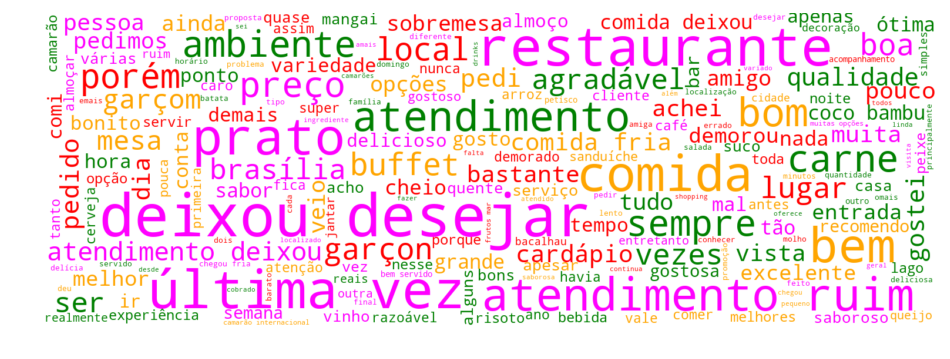

In [385]:

mapa_cores =ListedColormap(['orange','green','red','magenta'])

nuvem = WordCloud(background_color='white',
                colormap=mapa_cores,
                max_words =200,
                 max_font_size=100,width = 1520, height = 535).generate_from_text(str(termos_negativos))
plt.figure(figsize=(16,9))
plt.imshow(nuvem,interpolation="bilinear")
plt.axis("off")
plt.show()

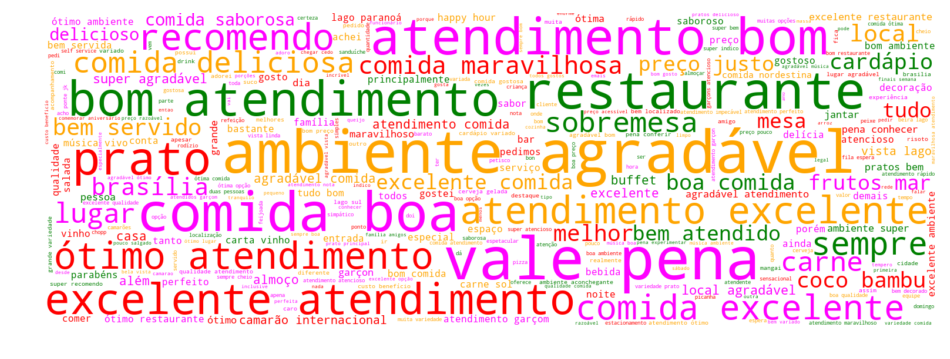

In [410]:
mapa_cores =ListedColormap(['orange','green','red','magenta'])

nuvem = WordCloud(background_color='white',
                colormap=mapa_cores,
                max_words =300,
                 max_font_size=100,width = 1520, height = 535).generate_from_text(str(termos_positivos))
plt.figure(figsize=(16,9))
plt.imshow(nuvem,interpolation="bilinear")
plt.axis("off")
plt.show()

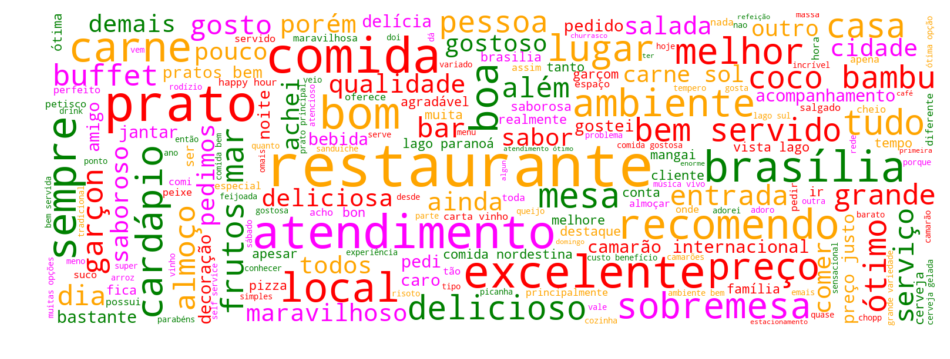

In [387]:
mapa_cores =ListedColormap(['orange','green','red','magenta'])

nuvem = WordCloud(background_color='white',
                colormap=mapa_cores,
                max_words =200,
                 max_font_size=100,width = 1520, height = 535).generate_from_text(str(termos_nao_avaliados))
plt.figure(figsize=(16,9))
plt.imshow(nuvem,interpolation="bilinear")
plt.axis("off")
plt.show()

In [399]:
dataframe_nao_avaliado[10:50]

,Avaliacao,Titulo,Texto,ConteudoLimpo,Bigrama,Sentimento
ID,,,,,,
174,0,Aniversário,Fomos recebidos da melhor maneira possível pel...,"[recebidos, melhor, maneira, possível, patrick...","[(recebidos, melhor), (melhor, maneira), (mane...",None
196,0,Boa pedida mas não é único,CocoBambu do Brasília Shopping: jantamos aqui ...,"[cocobambu, brasília, shopping, jantamos, 2, n...","[(cocobambu, brasília), (brasília, shopping), ...",None
197,0,Um dos melhores em Bsb,Sem dúvida um dos melhores restaurantes em Bra...,"[dúvida, melhores, restaurantes, brasilia, com...","[(dúvida, melhores), (melhores, restaurantes),...",None
205,0,Coco Bambu,Mais um dia com experiência positiva em todos...,"[dia, experiência, positiva, todos, sentidos, ...","[(dia, experiência), (experiência, positiva), ...",None
208,0,Fantástico!!,Patrick de longe o melhor garçom!! Camarão int...,"[patrick, longe, melhor, garçom, camarão, inte...","[(patrick, longe), (longe, melhor), (melhor, g...",None
215,0,Atendimento perfeito do Azevedo!,Sempre uma ótima experiência! Em particular o ...,"[sempre, ótima, experiência, particular, atend...","[(sempre, ótima), (ótima, experiência), (exper...",None
247,0,Almoço,Para mim o Coco Bambu é um dos melhores restau...,"[mim, coco, bambu, melhores, restaurantes, bra...","[(mim, coco), (coco, bambu), (bambu, melhores)...",None
271,0,Vale a pena!,A comida é sensacional e o astral do lugar mel...,"[comida, sensacional, astral, lugar, melhor, a...","[(comida, sensacional), (sensacional, astral),...",None
280,0,Almoço,Muito bom. Fomos atenciosamente atendidos pelo...,"[bom, atenciosamente, atendidos, garçon, eliom...","[(bom, atenciosamente), (atenciosamente, atend...",None


True
True
False
False
False
False
False
False


In [ ]:
('melhores', 'restaurantes')